## Demonstration of the package

This notebook serves as the project report. It demonstrates examples of the primary functions available in the toolbox. For each function, the input parameters, their physical meanings, and the returned parameters are explained.

### Distillation
This function calculates the number of stages required for a distillation process based on given separation properties. It also generates a McCabe-Thiele diagram to visually represent the stages.

Parameters:
- F (float): Feed flow rate (mol/hr)
- R (float): Reflux ratio
- z (float): Feed composition (mole fraction)
- q (float): Feed quality (ratio of liquid to total feed)
- alpha (float): Relative volatility
- xD (float): Distillate composition (mole fraction)
- D (float): Distillate flow rate (mol/hr)

Returns:
- nb_stages (int): Number of stages required
- fig (matplotlib Figure): McCabe-Thiele diagram
Example of Use:

Number of stages required: 3


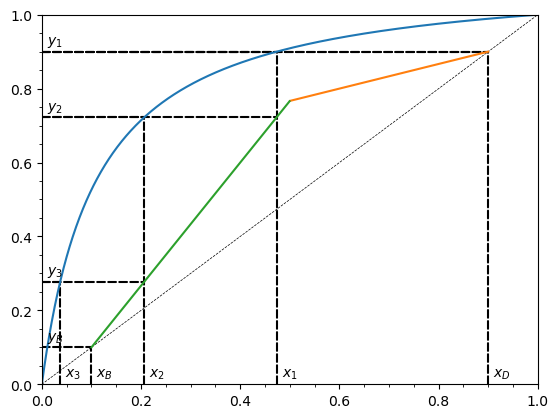

In [2]:
from Toolbox.Distillation import distillation
import matplotlib.pyplot as plt

nb_stages, fig = distillation(F=100, R=0.5, z=0.5, q=1, alpha=10, xD=0.9, D=50)

print(f'Number of stages required: {nb_stages}')
plt.show()

### Chemical Reaction
This part provides functionality for working with chemical elements and reactions. It allows users to initialize chemical elements, retrieve their properties, perform stoichiometric calculations for chemical reactions, and visualize molecules and reactions.

Parameters:
- rxn_str (str): a string containing the reaction

Returns:
- properties (pandas dataframe): a dataframe containing the properties of the reactants and the products and their stoichiometric coefficient
- fig (matplotlib Figure): a figure of the reaction


The properties returned are for each element:
- Stoichiometric coefficients (coefficient are negative and positive for the product)
- Molecular weight in [g/mol]
- IUPAC name
- SMILE
- Monoisotopic mass [g/mol]
- Number of H bond donors
- Number of H bond acceptors
- XlogP


\
**Remark**:\
The chemicals specified in the reaction string might be ambiguous for the database the package uses to convert them into SMILES. If you encounter the error "Compound {name} not found," try using the English name of the compound (e.g., use "water" for H2O).

Example of use:

   Stoichiometry MolecularWeight         IUPACName CanonicalSMILES  \
0           -1.0          39.997  sodium;hydroxide     [OH-].[Na+]   
1           -1.0           36.46          chlorane              Cl   
2            1.0           58.44   sodium;chloride     [Na+].[Cl-]   
3            1.0          18.015           oxidane               O   

  MonoisotopicMass  HBondDonorCount  HBondAcceptorCount  XLogP  
0      39.99250893                1                   1    NaN  
1       35.9766777                1                   0    0.8  
2       57.9586220                0                   1    NaN  
3     18.010564683                1                   1   -0.5  


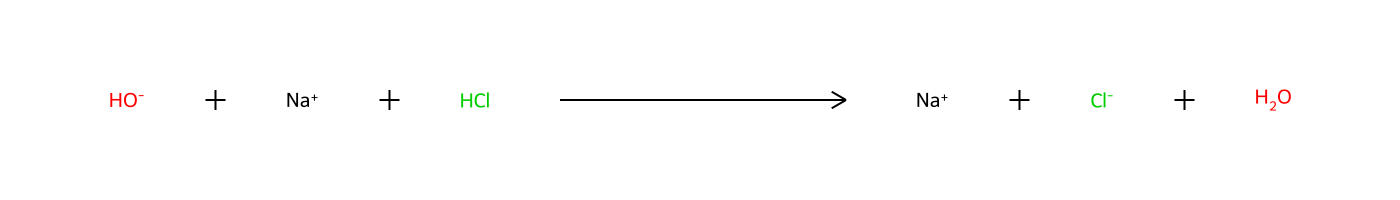

In [13]:
from Toolbox.chemical_rxn import equation

rxn = equation("NaOH + HCl -> NaCl + H2O")

properties_df = rxn.get_reaction_properties()

print(properties_df)

rxn.draw_reaction()

This part of the project can also be used to obtain some properties.

In [23]:
from Toolbox.chemical_rxn import elements

el = elements("NaOH")

print(el.properties)

{'CID': 14798, 'MolecularWeight': '39.997', 'CanonicalSMILES': '[OH-].[Na+]', 'IUPACName': 'sodium;hydroxide', 'MonoisotopicMass': '39.99250893', 'HBondDonorCount': 1, 'HBondAcceptorCount': 1}


As explained before, sometimes the chemical formula of the product/reactant is ambiguous to find the element that the user wanted to write in the reaction or the database find unrelated molecules. For example

In [19]:
el = elements("NO")

print(el.properties)

{'CID': 24822, 'MolecularWeight': '259.10100', 'CanonicalSMILES': '[No]', 'IUPACName': 'nobelium', 'MonoisotopicMass': '259.10100', 'HBondDonorCount': 0, 'HBondAcceptorCount': 0}


This is a case where the code returns nobelium instead of nitric oxide. So, for certain reactions, if the properties of the molecules/smiles do not correspond to the element you are looking for, try writing the name in English or the IUPAC name:

In [21]:
el = elements("Nitrogen monoxide")

print(el.properties)

{'CID': 145068, 'MolecularWeight': '30.006', 'CanonicalSMILES': '[N]=O', 'IUPACName': 'nitric oxide', 'XLogP': 0.2, 'MonoisotopicMass': '29.997988624', 'HBondDonorCount': 0, 'HBondAcceptorCount': 1}


### Liquid-Liquid Extraction (LLE)

This part of the project is used to calculate the number of stages required for this type of separation. In this part, two different type of separation processes are implemented: cross-flow and counter-flow imiscible LLE. For both, we assume that the dilute case is valid. Thus,
- the equilibrium constant $k_D$ is constant over the whole system
- the feed/raffinate flow rate $R$ is constant between the inlet and outlet
- the extract/solvent flow rate $E$ is constant between the inlet and outlet

For the counter-flow, we can use the package as

In [27]:
from Toolbox.LLE import lle_counter_flow

nb_stages, fig = lle_counter_flow(F=100, R=0.5, z=0.5, q=1, alpha=10, xD=0.9, D=50)


ImportError: cannot import name 'lle_counter_flow' from 'Toolbox.LLE' (/Users/nicolas/anaconda3/envs/ppchemproj/lib/python3.10/site-packages/Toolbox/LLE.py)